#### **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import squarify

#import warnings
#warnings.filterwarnings("ignore")

#### **Loading the data**

##### _**1. ratings_df**_

In [2]:
ratings_df = pd.read_csv('Data/BX-Book-Ratings.csv', encoding='latin-1', sep=';', error_bad_lines=False)
ratings_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


##### _**2. books_df**_

In [3]:
books_df = pd.read_csv('Data/BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False)
books_df.head()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\inte

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


##### _**3. users_df**_

In [4]:
users_df = pd.read_csv('Data/BX-Users.csv',  sep=';', encoding='latin-1', error_bad_lines=False)
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# **Data Understanding**

The Book Recommendation Dataset used in this project is from <a href='https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset'> Kaggle.</a> Books are identified by their respective ISBN.  Some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web site. In addition, it contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

##### _**1. ratings_df**_

In [5]:
ratings_df.info()

# Observations:
 # The dataframe has no missing values
 # It has 1149780 rows and 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


_**Univariate Analysis**_

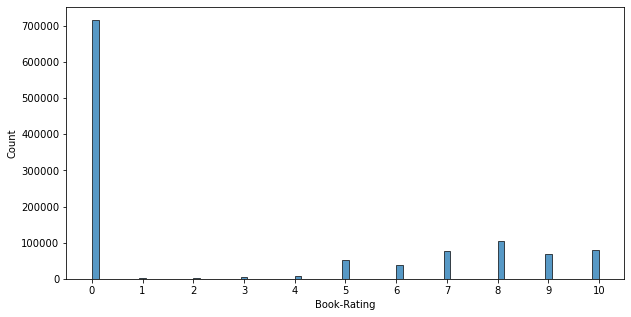

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ratings_df['Book-Rating'], ax=ax)
ax.set_xticks(range(0,11));
# Observations:
    # The book rating ranges from 0 to 10
    # Most books have a rating of 0
    # The ratings between 1-4 have very few books

##### _**2. books_df**_

In [7]:
books_df.info()

# Observations:
    # The dataframe has 271360 rows and 8 columns
    # The columns Book-Author, Publisher, Image-URL-L have missing values
    # All the columns are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
books_df['Year-Of-Publication'].unique()

# Observations:
    # The two missing Publisher names were put in the Year-Of-Publication column

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [9]:
books_df[(books_df['Year-Of-Publication'] == 'DK Publishing Inc' ) | (books_df['Year-Of-Publication'] == 'Gallimard' )]
# Observations:
    # There seems to be a mix-up with the column entries that lead to the three missing values in the Image-URL-L

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [10]:
# Removing the mix-up to be able to understand the date further

removed_mixup = books_df[(books_df['Year-Of-Publication'] != 'DK Publishing Inc' ) & (books_df['Year-Of-Publication'] != 'Gallimard' )].copy()

removed_mixup['Year-Of-Publication'] = removed_mixup['Year-Of-Publication'].astype(int)
removed_mixup = removed_mixup[(removed_mixup['Year-Of-Publication'] < 2024 ) & (removed_mixup['Year-Of-Publication'] >= 1000)]

In [11]:
# The statistical summary of the Year-Of-Publication column
removed_mixup['Year-Of-Publication'].describe()

# Observations:
    #The least year is 0. This might be a placeholder for missing years
    # The highest year is 2050. This is a year in the future and might bring issues later
    # On average most books in this dataset were published in 1959

count    266726.000000
mean       1993.687833
std           8.321200
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

**Checking for the trend in book production over time**

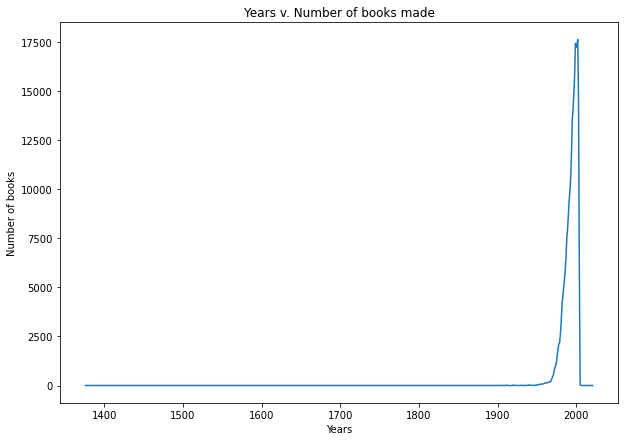

In [12]:
# years and books made
years = removed_mixup['Year-Of-Publication'].value_counts()
years

myKeys = list(years.keys())
myKeys.sort()

X = myKeys
y = []
for i in myKeys:
    y.append(years[i]) 

year_plot = pd.DataFrame()
year_plot['years'] = X
year_plot['numbers'] = y

plt.figure(figsize=(10, 7))
ax = sns.lineplot(x='years', y='numbers', data=year_plot)

ax.set(xlabel='Years', ylabel='Number of books', 
       title='Years v. Number of books made')
plt.show()
# Observations:
    # Most books in the dataset were published from 1950 to 2021 

##### _**3. users_df**_

In [13]:
users_df.info()

# Observations:
    # The dataset has 278858 rows and 3 columns
    # The Age column has alot of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
# Statistical summary of the Age column
users_df.Age.describe()

# Observations:
    # The least age is 0 and the oldest is 244 which is not possible
    # The average age is 34

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

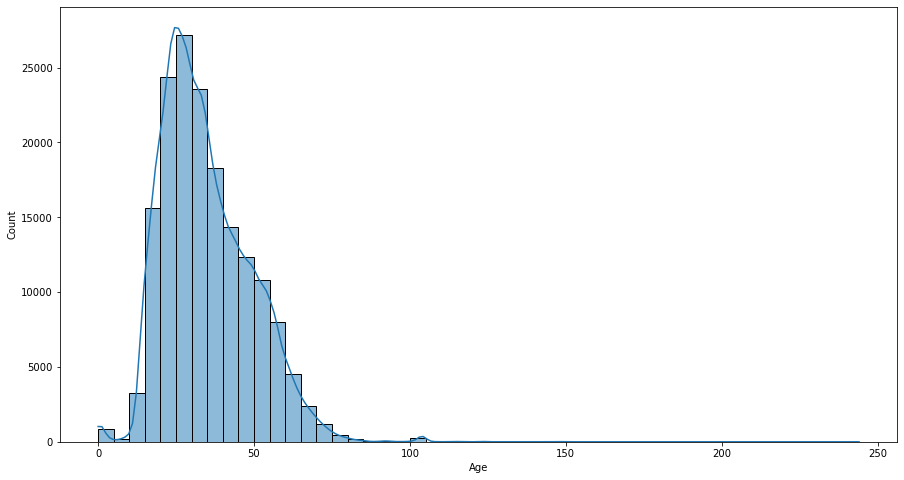

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(users_df.Age, bins=range(0, 245, 5), kde=True);

# Observations:
    # Most readers are below 50 years of age

#### **Creating a complete dataframe by joining the 3 dataframes above:**

#### **Joining ratings_df and users_df**

In [16]:
ratings_books = pd.merge(ratings_df, books_df,on='ISBN', how='inner')
print(ratings_books.info())
ratings_books

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB
None


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


#### **Joining ratings_books and users_df**

In [17]:
complete_df = pd.merge(ratings_books, users_df, on='User-ID', how='inner')
print(complete_df.info())
complete_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031135 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-S          1031136 non-null  object 
 8   Image-URL-M          1031136 non-null  object 
 9   Image-URL-L          1031132 non-null  object 
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB
None


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0


**Performing analysis on _complete df_**

1. Check the number of unique books in the dataframe

In [18]:
complete_df['ISBN'].nunique()

# Observations:
    # There are 270151 unique books in the dataset.

270151

2. Checking the years the books were published

In [19]:
complete_df['Location'].unique()

# Observations:
    # The locations are represented by city name, state name and country. This can be narrowed down to just country

array(['tyler, texas, usa', 'cincinnati, ohio, usa',
       'strafford, missouri, usa', ...,
       'shoreham-by-sea, , united kingdom', 'ccp, ccp, chile',
       'stuttgart, \\n/a\\"., germany"'], dtype=object)

3. Checking the number of authors in the dataframe

In [20]:
complete_df['Book-Author'].nunique()

# There are 101588 book authors in the dataset. 

101588

**4. Checking for author popularity to determine**

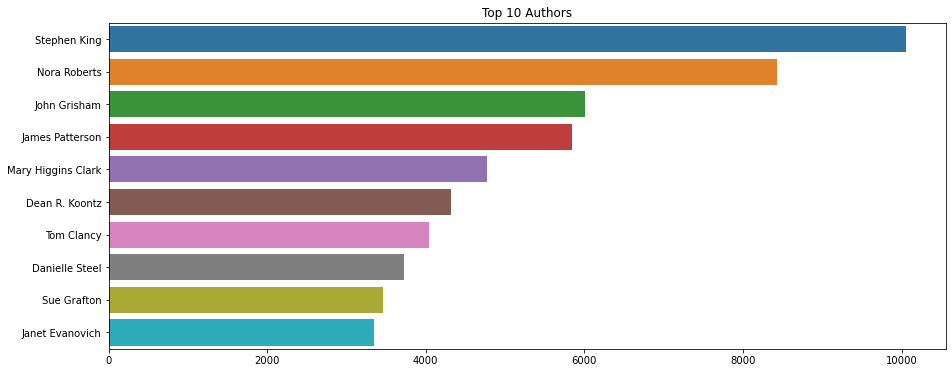

In [21]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=complete_df['Book-Author'].value_counts()[:10].values, 
            y=complete_df['Book-Author'].value_counts()[:10].index,
            orient='h',
            ax=ax
            )
ax.set_title("Top 10 Authors");

# Observations:
    # Stephen King is the most popular author with 10,000 copies sold

**5. Checking for the most popular books**

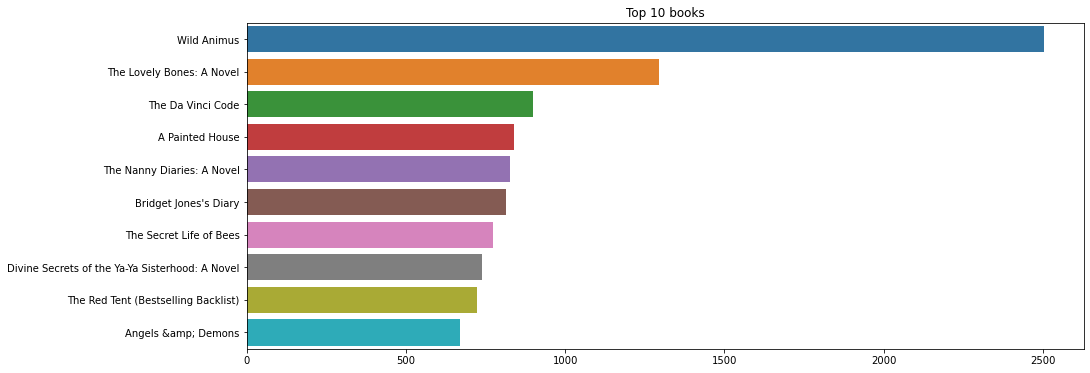

In [22]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=complete_df['Book-Title'].value_counts()[:10].values, 
            y=complete_df['Book-Title'].value_counts()[:10].index,
            orient='h',
            ax=ax
            )
ax.set_title("Top 10 books");

# Observations:
    # Wild Animus is the most popular book with 2500 copies sold.

**6. Average rating per book**

In [23]:
Average_rating = pd.DataFrame(complete_df.groupby(['Book-Title'])['Book-Rating'].mean()).reset_index()
Average_rating['No_users_rated_book'] = complete_df['Book-Title'].value_counts().values
Average_rating[:10]

# Observations:
    # A high number of users rating the book and does not equate to a high rating
    # For instance the first book has many users who have rated it but it has a low rating 0f 2.25

,Book-Title,Book-Rating,No_users_rated_book
0,A Light in the Storm: The Civil War Diary of ...,2.25,2502
1,Always Have Popsicles,0.00,1295
2,Apple Magic (The Collector's series),0.00,898
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00,838
4,Beyond IBM: Leadership Marketing and Finance ...,0.00,828
5,Clifford Visita El Hospital (Clifford El Gran...,0.00,815
6,Dark Justice,10.00,774
7,Deceived,0.00,740
8,Earth Prayers From around the World: 365 Pray...,5.00,723
9,Final Fantasy Anthology: Official Strategy Gu...,5.00,670


**7. Checking for book publishers in the dataset**

In [24]:
complete_df['Publisher'].nunique()

# Observations:
    # There are 16,729 publishers highlighted in the dataset

16729

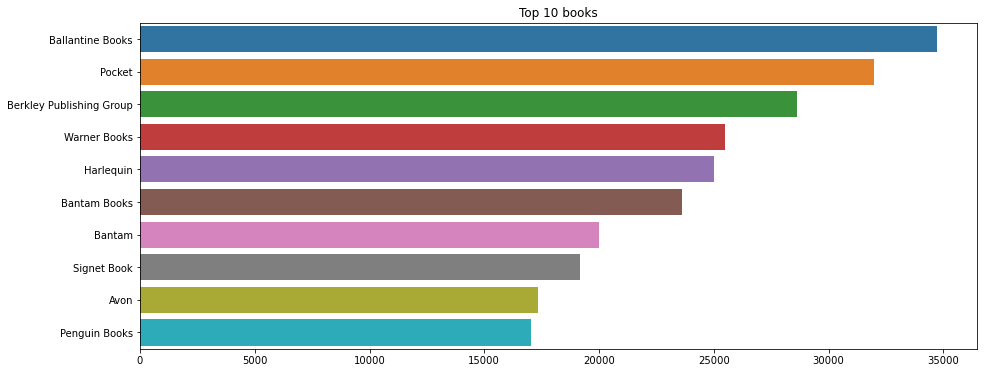

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x=complete_df['Publisher'].value_counts()[:10].values, 
            y=complete_df['Publisher'].value_counts()[:10].index,
            orient='h',
            ax=ax
            )
ax.set_title("Top 10 books");

# Observations:
    # The most popular publisher has sold about 35000 copies

# **Data Preparation**

**i. Removing irrevelant columns**

The removed columns are:
* **_Book-Title_**: ISBN and Book-Title represent the same thing, hence one of the columns can be dropped

* **_Year-Of-Publication_**: The year the book was published might have little effect on the model

* **_Image-URL-S, Image-URL-M, Image-URL-L_**: These columns represent the URL to the book covers and will have no effect on the model

**NB:** The columns Book-Author and Publisher will be keep since some readers may have the habit of reading books from a particular publisher or author because thats their niche. Hence recommending books from these authors/publishers might be beneficial.

In [26]:
complete_df.drop(['Book-Title', 'Year-Of-Publication','Image-URL-S', 'Image-URL-M','Image-URL-L'], \
                 axis=1, inplace=True)
complete_df.head()

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
0,276725,034545104X,0,M. J. Rose,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,M. J. Rose,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Orson Scott Card,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,TRUMAN CAPOTE,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Rebecca Wells,HarperCollins,"cincinnati, ohio, usa",23.0


**ii. Dealing with dupicates**

Duplicates were checked using the User-ID and ISBN since we don't want a user to rate the same book more than once.

In [27]:
complete_df.duplicated(subset=['User-ID', 'ISBN'], keep=False).sum()

# Observations:
    # The data has no duplicates

0

**iii. Dealing with missing values**

In [28]:
# Columns with missing values
{col:complete_df[col].isnull().sum() for col in complete_df.columns if complete_df[col].isnull().sum()}

{'Book-Author': 1, 'Publisher': 2, 'Age': 277835}

* **_Book-Author Column_**

In [29]:
# Book- Author column

complete_df[complete_df['Book-Author'].isnull()]

# Checking online, the book Credit Suisse Guide to Managing Your Personal Wealth was authored by Larissa Anne Downes

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
486486,98647,9627982032,8,NaN,Edinburgh Financial Publishing,"selayang, selangor, malaysia",26.0


On checking <a href='https://www.goodreads.com/book/show/7253684-credit-suisse-guide-to-managing-your-personal-wealth'> online</a>, the book _**Credit Suisse Guide to Managing Your Personal Wealth** (ISBN: 9627982032)_ was authored by **Larissa Anne Downes**

In [30]:
# Filling in the missing value with the name of the author
complete_df['Book-Author'].fillna(value='Larissa Anne Downes', inplace=True)

In [31]:
# Confirming the missing value in this column has been removed
complete_df['Book-Author'].isnull().sum()

0

* _**Publisher column**_

In [32]:
# Publisher column

complete_df[complete_df['Publisher'].isnull()]

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
9777,98391,193169656X,9,Elaine Corvidae,NaN,"morrow, georgia, usa",52.0
9786,98391,1931696993,9,Linnea Sinclair,NaN,"morrow, georgia, usa",52.0


On checking <a href='https://www.amazon.com/Tyrant-Moon-Elaine-Corvidae/dp/159426029X'> online</a>, the book _**Tyrant Moon** (ISBN: 193169656X)_ was published by **Mundania Press LLC**.

On checking <a href='https://www.goodreads.com/en/book/show/352725'> online</a>, the book _**Finders Keepers** (ISBN: 1931696993)_ was published by **Bantam**.

In [33]:
# Filling in the missing values with the name of the publishers

complete_df[complete_df['ISBN']=='193169656X'] = complete_df[complete_df['ISBN']=='193169656X'].fillna(value='Mundania Press LLC')
complete_df[complete_df['ISBN']=='1931696993'] = complete_df[complete_df['ISBN']=='1931696993'].fillna(value='Bantam')

In [34]:
# Confirming the missing value in this column has been removed
complete_df['Publisher'].isnull().sum()

0

* _**Age column**_

In [35]:
complete_df.Age.isnull().value_counts(normalize=True)

# 27% of the values in this column are missing. The missing values will be replaced with the median

False    0.730554
True     0.269446
Name: Age, dtype: float64

In [36]:
complete_df['Age'].median()

35.0

In [37]:
median =complete_df['Age'].median()
complete_df.Age.fillna(value=median, inplace=True)

In [38]:
# Confirming the missing value in this column has been removed
complete_df['Age'].isnull().sum()

0

**iv. Splitting location to represent the user country only**

In [39]:
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip(string.punctuation)
complete_df.head()

,User-ID,ISBN,Book-Rating,Book-Author,Publisher,Location,Age
0,276725,034545104X,0,M. J. Rose,Ballantine Books,usa,35.0
1,2313,034545104X,5,M. J. Rose,Ballantine Books,usa,23.0
2,2313,0812533550,9,Orson Scott Card,Tor Books,usa,23.0
3,2313,0679745580,8,TRUMAN CAPOTE,Vintage,usa,23.0
4,2313,0060173289,9,Rebecca Wells,HarperCollins,usa,23.0


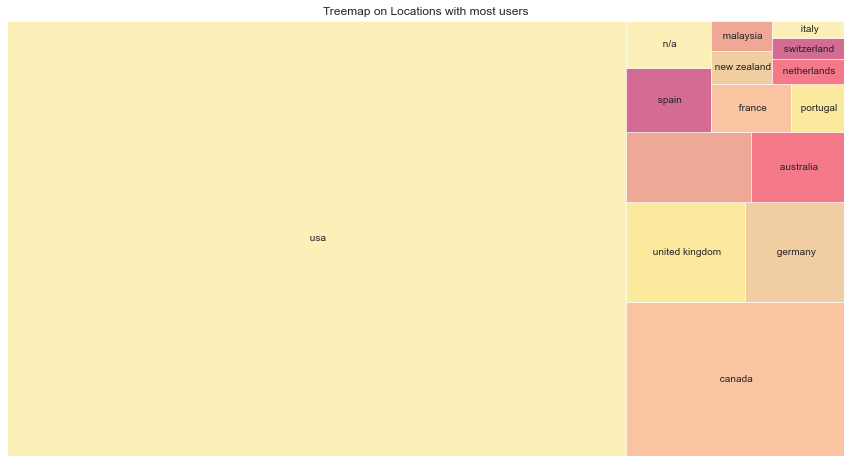

In [40]:
# Displaying location with most users
locations = complete_df['Location'].value_counts()[:15]
loc_list = list(complete_df['Location'].value_counts()[:15].keys())
loc_val_list = []
for i in loc_list:
    loc_val_list.append(locations[i])

loc_df = pd.DataFrame(loc_list, columns=['Location'])
loc_df['Values'] = loc_val_list

# loc_df.set_index('Location', inplace=True)

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

plt.figure(figsize=(15, 8))
sns.set_style(style='whitegrid')
squarify.plot(sizes=loc_df['Values'], label=loc_df['Location'], alpha=0.6, color=colors).set(title='Treemap on Locations with most users')
plt.axis('off')
plt.show();

# Observations:
    # Majority of the users are in the US
    # There are users whose country is not known and is represented by n/a

**v. Checking the datatypes**

In [41]:
complete_df.dtypes

# Observation:
    # All the datatypes are correct

User-ID          int64
ISBN            object
Book-Rating      int64
Book-Author     object
Publisher       object
Location        object
Age            float64
dtype: object